### FaST-LMM Simulation Export

Export results and data from first example in: https://nbviewer.jupyter.org/github/fastlmm/FaST-LMM/blob/master/doc/ipynb/FaST-LMM.ipynb

In [1]:
# import the algorithm
!pip install -q xarray zarr
import os
import os.path as osp
import numpy as np
import xarray as xr
import pandas as pd
from fastlmm.association import single_snp
from pysnptools.snpreader import Bed
repo_dir = "/work/FaST-LMM"

In [2]:
# set up data
##############################
bed_fn = osp.join(repo_dir, "tests/datasets/synth/all")
pheno_fn = osp.join(repo_dir, "tests/datasets/synth/pheno_10_causals.txt")
cov_fn = osp.join(repo_dir, "tests/datasets/synth/cov.txt")

In [35]:
# run gwas
###################################################################
count_A1 = True
results_df = single_snp(
    bed_fn, pheno_fn, covar=cov_fn, 
    count_A1=count_A1, 
    # Force these settings to make parity easier to reach
    leave_out_one_chrom=False, 
    h2=0,
    force_full_rank=True
)

Loading fam file /work/FaST-LMM/tests/datasets/synth/all.fam
Loading bim file /work/FaST-LMM/tests/datasets/synth/all.bim
Setting GB_goal to 0.1446951289176941 GB
reading 5000 SNPs in blocks of 500 and adding up kernels (for 500 individuals)
bed file is open /work/FaST-LMM/tests/datasets/synth/all.bed
0.18 seconds elapsed
h2=0
single_snp: Working on snp block 0 of 10
time=0.0727834701538086
single_snp: Working on snp block 1 of 10
time=0.028245210647583008
single_snp: Working on snp block 2 of 10
time=0.028414249420166016
single_snp: Working on snp block 3 of 10
time=0.024550914764404297
single_snp: Working on snp block 4 of 10
time=0.026447296142578125
single_snp: Working on snp block 5 of 10
time=0.028400182723999023
single_snp: Working on snp block 6 of 10
time=0.02503514289855957
single_snp: Working on snp block 7 of 10
time=0.027478456497192383
single_snp: Working on snp block 8 of 10
time=0.026927709579467773
single_snp: Working on snp block 9 of 10
time=0.040212392807006836


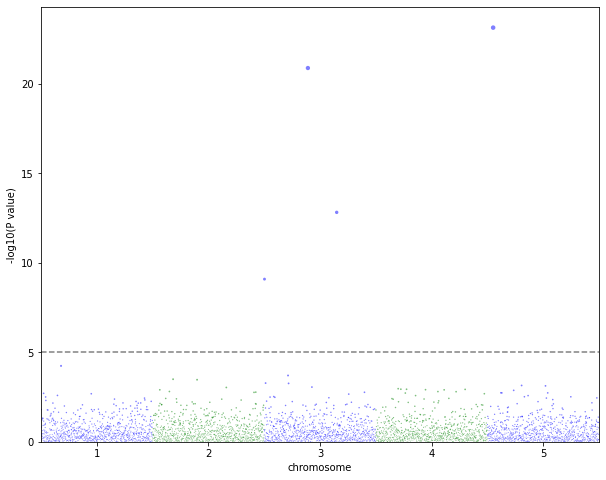

In [36]:
# manhattan plot
import pylab
import fastlmm.util.util as flutil
pylab.rcParams['figure.figsize'] = (10.0, 8.0)#For some reason, need again (appears above too) to get big figures
flutil.manhattan_plot(results_df[["Chr", "ChrPos", "PValue"]].values,pvalue_line=1e-5,xaxis_unit_bp=False)
pylab.show()

In [37]:
results_df.head()

,sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
0,4052,snp495_m0_.01m1_.04,5,4052,4052,7.108119e-24,-0.430418,0.040536,0.430004,0.0,0.0
1,2392,snp1422_m0_.49m1_.5,3,2392,2392,1.285284e-21,0.409757,0.040927,0.409676,0.0,0.0
2,2650,snp1200_m0_.37m1_.36,3,2650,2650,1.501531e-13,-0.322766,0.042478,0.322615,0.0,0.0
3,2003,snp433_m0_.14m1_.11,3,2003,2003,8.084090e-10,0.271265,0.043298,0.270544,0.0,0.0
4,180,snp2504_m0_.49m1_.15,1,180,180,5.708216e-05,0.179342,0.044177,0.179154,0.0,0.0


In [38]:
results_df['sid_index'].value_counts().max()

1

In [39]:
results_df['sid_index'].max()

4999

In [40]:
len(results_df)

5000

In [41]:
!ls /work/FaST-LMM/tests/datasets/synth

DebugEmitFolds.txt  allButChr1.bed  chr1.bim	   pheno_10_causals.txt
all.bed		    allButChr1.bim  chr1.fam
all.bim		    allButChr1.fam  chr1.sets.txt
all.fam		    chr1.bed	    cov.txt


In [42]:
bed = Bed(bed_fn, count_A1=count_A1)
bed.shape

Loading fam file /work/FaST-LMM/tests/datasets/synth/all.fam
Loading bim file /work/FaST-LMM/tests/datasets/synth/all.bim


(500, 5000)

In [43]:
bed_gt = bed.read(dtype=np.float32, view_ok=False).val.T
assert bed_gt.min() >= 0
assert bed_gt.max() <= 2
bed_gt = bed_gt.astype(np.int8)
bed_gt.shape, bed_gt.dtype

bed file is open /work/FaST-LMM/tests/datasets/synth/all.bed


((5000, 500), dtype('int8'))

In [44]:
# (chromosome, genetic distance, basepair distance)
bed.pos

array([[   1,    0,    0],
       [   1,    1,    1],
       [   1,    2,    2],
       ...,
       [   5, 4997, 4997],
       [   5, 4998, 4998],
       [   5, 4999, 4999]])

In [45]:
df_ph = pd.read_csv(pheno_fn, sep='\s+', names=['iid', 'fid', 'v'])
assert len(df_ph) == bed_gt.shape[1]
df_ph.head()

,iid,fid,v
0,cid0P0,cid0P0,0.485340
1,cid1P0,cid1P0,-0.207698
2,cid2P0,cid2P0,1.490908
3,cid3P0,cid3P0,-1.212900
4,cid4P0,cid4P0,0.429320


In [46]:
df_cov = pd.read_csv(cov_fn, sep='\s+', names=['iid', 'fid', 'v'])
assert len(df_cov) == bed_gt.shape[1]
df_cov.head()

,iid,fid,v
0,cid0P0,cid0P0,0.548466
1,cid1P0,cid1P0,0.250912
2,cid2P0,cid2P0,-0.638701
3,cid3P0,cid3P0,0.480537
4,cid4P0,cid4P0,0.618070


In [47]:
df_cov.tail()

,iid,fid,v
495,cid495P1,cid495P1,-0.550367
496,cid496P1,cid496P1,-0.144458
497,cid497P1,cid497P1,-0.623505
498,cid498P1,cid498P1,1.054939
499,cid499P1,cid499P1,-0.778998


In [48]:
ds = xr.Dataset({
    'data': xr.DataArray(bed_gt, dims=['variant', 'sample']),
    'sample_id': xr.DataArray(bed.iid[:,0], dims='sample'),
    # Same as sample_id
    #'family_id': xr.DataArray(bed.iid[:,1], dims='sample'),
    'covariate_0': xr.DataArray(df_cov['v'].values, dims='sample'),
    'phenotype_0': xr.DataArray(df_ph['v'].values, dims='sample'),
    'variant_id': xr.DataArray(bed.sid, dims='variant'),
    'contig': xr.DataArray(bed.pos[:, 0], dims='variant'),
    # Same as pos
    #'cm_pos': xr.DataArray(bed.pos[:, 1], dims='variant'),
    'pos': xr.DataArray(bed.pos[:, 2], dims='variant')
})
ds

<xarray.Dataset>
Dimensions:      (sample: 500, variant: 5000)
Dimensions without coordinates: sample, variant
Data variables:
    data         (variant, sample) int8 0 0 0 0 0 0 0 0 0 ... 0 0 0 0 0 0 0 0 0
    sample_id    (sample) <U8 'cid0P0' 'cid1P0' ... 'cid498P1' 'cid499P1'
    covariate_0  (sample) float64 0.5485 0.2509 -0.6387 ... -0.6235 1.055 -0.779
    phenotype_0  (sample) float64 0.4853 -0.2077 1.491 ... 1.789 -0.8066 -1.73
    variant_id   (variant) <U20 'snp625_m0_.03m1_.07' ... 'snp124_m0_.23m1_.08'
    contig       (variant) int64 1 1 1 1 1 1 1 1 1 1 1 ... 5 5 5 5 5 5 5 5 5 5 5
    pos          (variant) int64 0 1 2 3 4 5 6 ... 4994 4995 4996 4997 4998 4999

In [49]:
np.unique(ds.data.values, return_counts=True)

(array([0, 1, 2], dtype=int8), array([1427136,  842198,  230666]))

In [50]:
path = 'data.zarr'
ds.to_zarr(path, mode='w')
path

'data.zarr'

In [51]:
path = 'data.nc'
ds.to_netcdf(path, mode='w')
path

'data.nc'

In [52]:
path = 'results.csv'
results_df.to_csv(path, index=False)
path

'results.csv'

In [54]:
!head $path

sid_index,SNP,Chr,GenDist,ChrPos,PValue,SnpWeight,SnpWeightSE,SnpFractVarExpl,Mixing,Nullh2
4052,snp495_m0_.01m1_.04,5,4052,4052,7.108118575444987e-24,-0.43041755413727445,0.040536260853199065,0.4300041045303395,0.0,0.0
2392,snp1422_m0_.49m1_.5,3,2392,2392,1.2852836211469459e-21,0.40975657154239936,0.040927190921249045,0.4096761146695922,0.0,0.0
2650,snp1200_m0_.37m1_.36,3,2650,2650,1.5015306088519158e-13,-0.32276575977457117,0.04247756063001653,0.3226147654672045,0.0,0.0
2003,snp433_m0_.14m1_.11,3,2003,2003,8.084089926658497e-10,0.2712651979175288,0.04329846544894137,0.27054392998157833,0.0,0.0
180,snp2504_m0_.49m1_.15,1,180,180,5.708216071918073e-05,0.17934225391488576,0.044176864770877226,0.1791536552637844,0.0,0.0
2214,snp2804_m0_.16m1_.3,3,2214,2214,0.00019653780705746626,-0.16596825982294738,0.04424107155434128,0.16594255298405428,0.0,0.0
1184,snp1162_m0_.05m1_.29,2,1184,1184,0.0003177823370517071,-0.16053623522968877,0.04427605465421659,0.1605301926943067,0.0,0.0
1399,snp1403_m0

In [55]:
xr.open_dataset('data.nc')

<xarray.Dataset>
Dimensions:      (sample: 500, variant: 5000)
Dimensions without coordinates: sample, variant
Data variables:
    data         (variant, sample) int8 ...
    variant_id   (variant) object ...
    contig       (variant) int32 ...
    pos          (variant) int32 ...
    sample_id    (sample) object ...
    covariate_0  (sample) float64 ...
    phenotype_0  (sample) float64 ...